In [6]:
# Exploratory Analysis - Embrapa Viticulture Dataset

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Configs
sns.set(style="whitegrid")
ROOT = Path().resolve().parent  # raiz do projeto
DATA_DIR = ROOT / "data"

# Helper to load CSV
def load_csv(filename):
    path = os.path.join(DATA_DIR, filename)
    df = pd.read_csv(path)
    print(f"✅ {filename}: {df.shape[0]} rows × {df.shape[1]} cols")
    return df

# Load datasets
df_prod = load_csv("production.csv")
df_proc = load_csv("processing.csv")
df_com = load_csv("commercialization.csv")
df_exp = load_csv("exportation.csv")
df_imp = load_csv("importation.csv")


✅ production.csv: 2754 rows × 4 cols
✅ processing.csv: 11448 rows × 5 cols
✅ commercialization.csv: 3348 rows × 4 cols
✅ exportation.csv: 27702 rows × 5 cols
✅ importation.csv: 10800 rows × 5 cols


In [7]:
df_prod.head()



,Category,Product,Quantity (L.),Year
0,VINHO DE MESA,Total,217208604.0,1970
1,VINHO DE MESA,Tinto,174224052.0,1970
2,VINHO DE MESA,Branco,748400.0,1970
3,VINHO DE MESA,Rosado,42236152.0,1970
4,VINHO FINO DE MESA (VINIFERA),Total,23899346.0,1970


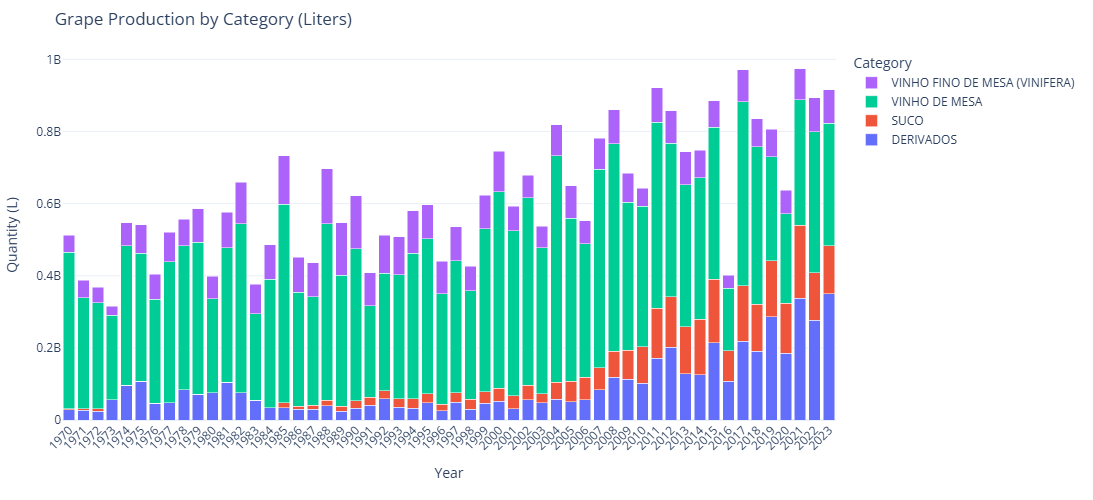

In [23]:
# Total production by category and year
# This chart will show the annual production stacked by category (such as "Wine Grapes", "Table Grapes", etc.) as per actual data.
import plotly.graph_objects as go

df_prod_grouped = (
    df_prod.groupby(["Year", "Category"])["Quantity (L.)"]
    .sum()
    .unstack()
)

# Build stacked bar chart
fig = go.Figure()

for category in df_prod_grouped.columns:
    fig.add_trace(go.Bar(
        x=df_prod_grouped.index,
        y=df_prod_grouped[category],
        name=category
    ))

# Layout customization
fig.update_layout(
    barmode="stack",
    title="Grape Production by Category (Liters)",
    xaxis_title="Year",
    yaxis_title="Quantity (L)",
    width=1000,
    height=500,
    template="plotly_white",
    xaxis=dict(type="category", tickangle=-45),
    legend_title="Category",
    margin=dict(t=50, r=60, b=80, l=60),
)

fig.show()

In [11]:
df_proc.head()


,GrapeType,Category,Cultivar,Quantity (kg),Year
0,Viníferas,TINTAS,Total,10448228.0,1970
1,Viníferas,TINTAS,Alicante Bouschet,NaN,1970
2,Viníferas,TINTAS,Ancelota,NaN,1970
3,Viníferas,TINTAS,Aramon,NaN,1970
4,Viníferas,TINTAS,Alfrocheiro,NaN,1970


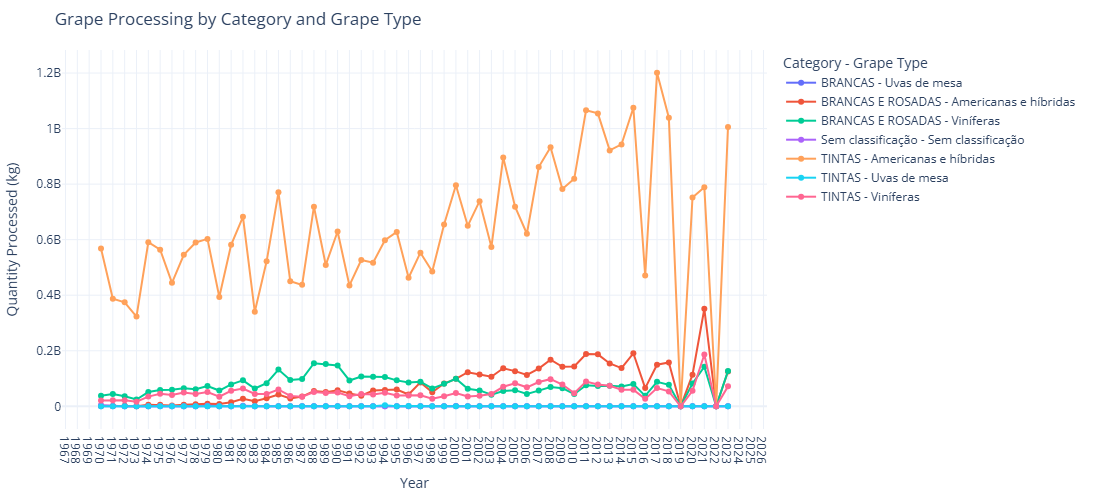

In [24]:
# Grouping by year and category
# This graph allows you to analyze how grapes have been processed over the years, differentiating between the two main destinations: juice production and wine production.
import plotly.graph_objects as go

df_proc_grouped = (
    df_proc.groupby(["Year", "Category", "GrapeType"])["Quantity (kg)"]
    .sum()
    .reset_index()
)

pivot_df = df_proc_grouped.pivot_table(
    index="Year",
    columns=["Category", "GrapeType"],
    values="Quantity (kg)",
    aggfunc="sum"
)

# Create figure
fig = go.Figure()

# Add each line to the figure
for (category, grape_type) in pivot_df.columns:
    fig.add_trace(go.Scatter(
        x=pivot_df.index,
        y=pivot_df[(category, grape_type)],
        mode='lines+markers',
        name=f"{category} - {grape_type}"
    ))

# Customize layout
fig.update_layout(
    title="Grape Processing by Category and Grape Type",
    xaxis_title="Year",
    yaxis_title="Quantity Processed (kg)",
    width=1000,
    height=500,
    legend_title="Category - Grape Type",
    template="plotly_white",
    xaxis=dict(dtick=1),
    margin=dict(t=50, r=150, b=50, l=60)
)

fig.show()


In [27]:
df_exp.head()
df_imp.head()


,Type,Country,Quantity (kg),Value (US$),Year
0,Vinhos de mesa,Africa do Sul,NaN,NaN,1970
1,Vinhos de mesa,Alemanha,52297.0,30498.0,1970
2,Vinhos de mesa,Argélia,NaN,NaN,1970
3,Vinhos de mesa,Arábia Saudita,NaN,NaN,1970
4,Vinhos de mesa,Argentina,19525.0,12260.0,1970


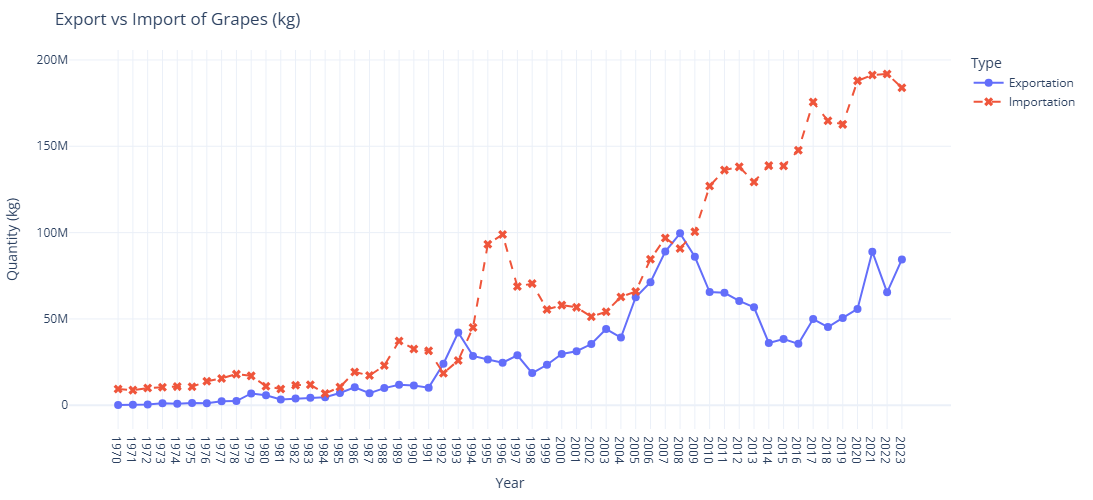

In [29]:
import plotly.graph_objects as go

# Comparison of Export and Import of Grapes over the Years
# Group export and import data
export_series = df_exp.groupby("Year")["Quantity (kg)"].sum()
import_series = df_imp.groupby("Year")["Quantity (kg)"].sum()

# Create interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=export_series.index,
    y=export_series.values,
    mode="lines+markers",
    name="Exportation",
    marker=dict(symbol="circle", size=8),
    line=dict(width=2)
))

fig.add_trace(go.Scatter(
    x=import_series.index,
    y=import_series.values,
    mode="lines+markers",
    name="Importation",
    marker=dict(symbol="x", size=8),
    line=dict(width=2, dash="dash")
))

# Customize layout
fig.update_layout(
    title="Export vs Import of Grapes (kg)",
    xaxis_title="Year",
    yaxis_title="Quantity (kg)",
    template="plotly_white",
    width=1000,
    height=500,
    xaxis=dict(type="category"),
    legend_title="Type",
    margin=dict(t=50, r=60, b=60, l=60)
)

fig.show()


In [30]:
df_com.head()

,Category,Product,Quantity (L.),Year
0,VINHO DE MESA,Total,98327606.0,1970
1,VINHO DE MESA,Tinto,83300735.0,1970
2,VINHO DE MESA,Rosado,107681.0,1970
3,VINHO DE MESA,Branco,14919190.0,1970
4,VINHO FINO DE MESA,Total,4430629.0,1970


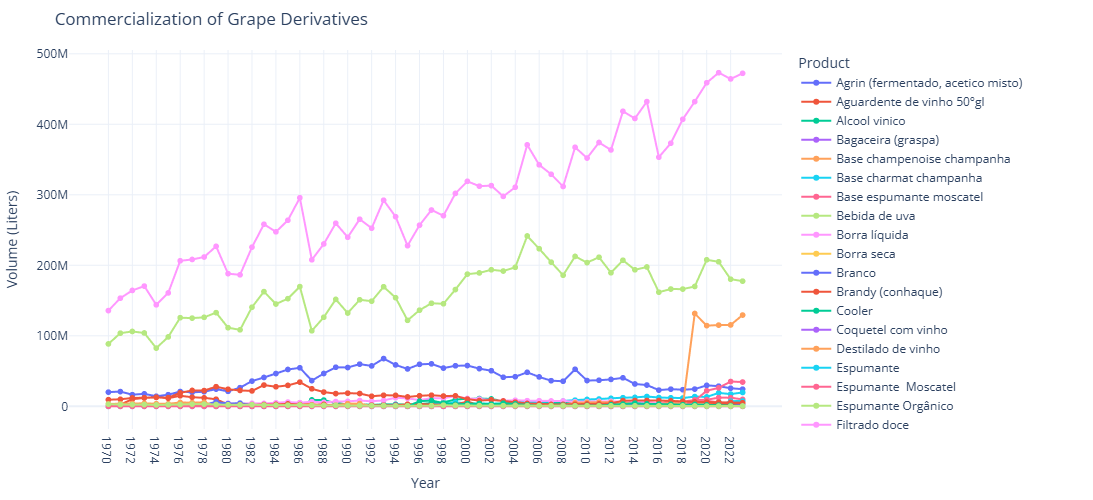

In [32]:
import plotly.express as px

# Evolution of the marketing of products such as juice, table wine, fine wine and others.
# Group and pivot data
df_com_grouped = (
    df_com.groupby(["Year", "Product"])["Quantity (L.)"]
    .sum()
    .reset_index()
)

# Create interactive line chart
fig = px.line(
    df_com_grouped,
    x="Year",
    y="Quantity (L.)",
    color="Product",
    markers=True,
    title="Commercialization of Grape Derivatives",
    labels={
        "Year": "Year",
        "Quantity (L.)": "Volume (Liters)",
        "Product": "Product Type"
    }
)

# Customize layout
fig.update_layout(
    template="plotly_white",
    width=1000,
    height=500,
    legend_title="Product",
    xaxis=dict(type="category"),
    margin=dict(t=50, r=60, b=60, l=60)
)

fig.show()
